# Homework06

Exercises to practice pandas, data analysis and regression

## Goals

- Understand the effects of pre-processing data
- Get familiar with the ML flow: encode -> normalize -> train -> evaluate
- Understand the difference between regression and classification tasks
- Build intuition for different regression models

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this homework.

In [59]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

from data_utils import object_from_json_url
from data_utils import StandardScaler
from data_utils import LinearRegression, SGDRegressor
from data_utils import regression_error
from sklearn.preprocessing import OneHotEncoder


### Load Dataset

Let's load up the full [ANSUR](https://www.openlab.psu.edu/ansur2/) dataset that we looked at briefly in [Week 02](https://github.com/DM-GY-9103-2024F-H/WK02).

This is the dataset that has anthropometric information about U.S. Army personnel.

#### WARNING

Like we mentioned in class, this dataset is being used for these exercises due to the level of detail in the dataset and the rigorous process that was used in collecting the data.

This is a very specific dataset and should not be used to draw general conclusions about people, bodies, or anything else that is not related to the distribution of physical features of U.S. Army personnel.

In [61]:
# Load Dataset
ANSUR_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/ansur.json"
ansur_data = object_from_json_url(ANSUR_FILE)

# Look at first 2 records
ansur_data[:2]

[{'age': 18,
  'gender': 'F',
  'height': 66,
  'weight': 135,
  'span': 1699,
  'stature': 1645,
  'ear': {'breadth': 30, 'length': 61, 'protrusion': 20},
  'foot': {'breadth': 97, 'length': 243},
  'hand': {'breadth': 78, 'length': 182, 'palm': 108},
  'head': {'height': 243, 'circumference': 557}},
 {'age': 30,
  'gender': 'M',
  'height': 68,
  'weight': 207,
  'span': 1749,
  'stature': 1715,
  'ear': {'breadth': 35, 'length': 63, 'protrusion': 17},
  'foot': {'breadth': 100, 'length': 252},
  'hand': {'breadth': 87, 'length': 184, 'palm': 114},
  'head': {'height': 238, 'circumference': 560}}]

#### Nested data

This is that *nested* dataset from Week 02.

# 🤔

Let's load it into a `DataFrame` to see what happens.

In [62]:
# Read into DataFrame
ansur_df = pd.DataFrame.from_records(ansur_data)
ansur_df.head()

,age,gender,height,weight,span,stature,ear,foot,hand,head
0,18,F,66,135,1699,1645,"{'breadth': 30, 'length': 61, 'protrusion': 20}","{'breadth': 97, 'length': 243}","{'breadth': 78, 'length': 182, 'palm': 108}","{'height': 243, 'circumference': 557}"
1,30,M,68,207,1749,1715,"{'breadth': 35, 'length': 63, 'protrusion': 17}","{'breadth': 100, 'length': 252}","{'breadth': 87, 'length': 184, 'palm': 114}","{'height': 238, 'circumference': 560}"
2,27,M,67,121,1684,1657,"{'breadth': 36, 'length': 59, 'protrusion': 24}","{'breadth': 92, 'length': 251}","{'breadth': 84, 'length': 180, 'palm': 103}","{'height': 239, 'circumference': 516}"
3,20,M,73,185,1878,1828,"{'breadth': 36, 'length': 60, 'protrusion': 21}","{'breadth': 104, 'length': 280}","{'breadth': 95, 'length': 201, 'palm': 124}","{'height': 270, 'circumference': 582}"
4,33,M,76,150,1977,1883,"{'breadth': 39, 'length': 65, 'protrusion': 27}","{'breadth': 101, 'length': 271}","{'breadth': 90, 'length': 194, 'palm': 113}","{'height': 254, 'circumference': 559}"



# 😓🙄

That didn't work too well. We ended up with objects in our columns.

Luckily, our `DataFrame` library has a function called [`json_normalize()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) that can help.

In [63]:
# Read into DataFrame
ansur_df = pd.json_normalize(ansur_data)
ansur_df.head()

,age,gender,height,weight,span,stature,ear.breadth,ear.length,ear.protrusion,foot.breadth,foot.length,hand.breadth,hand.length,hand.palm,head.height,head.circumference
0,18,F,66,135,1699,1645,30,61,20,97,243,78,182,108,243,557
1,30,M,68,207,1749,1715,35,63,17,100,252,87,184,114,238,560
2,27,M,67,121,1684,1657,36,59,24,92,251,84,180,103,239,516
3,20,M,73,185,1878,1828,36,60,21,104,280,95,201,124,270,582
4,33,M,76,150,1977,1883,39,65,27,101,271,90,194,113,254,559


Much better. `DataFrames` are magic.

#### Data Exploration

Before we start creating models, let's do a little bit of data analysis and get a feeling for the shapes, distributions and relationships of our data.

1. Print `min`, `max` and `average` values for all of the features.
2. Print `covariance` tables for `age`, `ear.length` and `head.circumference`.
3. Plot `age`, `ear.length` and `head.circumference` versus the $1$ *feature* that is most correlated to each of them.

Don't forget to *encode* and *normalize* the data.

# Work on Data Exploration here

# Encode non-numerical features
ansur_df['female'] = (ansur_df['gender'] == 'F').astype(int)
ansur_df.drop(columns=['gender'], inplace=True)

# 1. Print min, max, avg
# ansur_df.describe()
print("Min:", ansur_df.min())
print("Max:", ansur_df.max())
print("Av:", ansur_df.mean())

In [64]:
ansur_df_test_copy =ansur_df.copy()
ansur_df['female'] = (ansur_df['gender'] == 'F').astype(int)
ansur_df.drop(columns=['gender'], inplace=True)
print("Min:", ansur_df.min())
print("Max:", ansur_df.max())
print("Av:", ansur_df.mean())

Min: age                     17
height                  56
weight                   0
span                  1323
stature               1409
ear.breadth             25
ear.length              46
ear.protrusion          13
foot.breadth            77
foot.length            198
hand.breadth            67
hand.length            145
hand.palm               88
head.height            206
head.circumference     502
female                   0
dtype: int64
Max: age                     58
height                  94
weight                 321
span                  2121
stature               1993
ear.breadth             46
ear.length              81
ear.protrusion          34
foot.breadth           126
foot.length            323
hand.breadth           105
hand.length            239
hand.palm              140
head.height            295
head.circumference     635
female                   1
dtype: int64
Av: age                     29.745357
height                  68.247321
weight                 174.5

                         age    height    weight      span   stature  \
age                 1.000179  0.029467  0.217017  0.064304  0.037972   
height              0.029467  1.000179  0.659590  0.869103  0.959988   
weight              0.217017  0.659590  1.000179  0.662828  0.682587   
span                0.064304  0.869103  0.662828  1.000179  0.899400   
stature             0.037972  0.959988  0.682587  0.899400  1.000179   
ear.breadth         0.187740  0.355310  0.361981  0.348283  0.365847   
ear.length          0.292098  0.421910  0.487481  0.401564  0.438604   
ear.protrusion     -0.009254  0.283853  0.242281  0.268229  0.289324   
foot.breadth        0.064993  0.662081  0.708759  0.681016  0.677517   
foot.length         0.048699  0.820186  0.688228  0.862806  0.844233   
hand.breadth        0.133830  0.712196  0.710663  0.731574  0.727613   
hand.length         0.104642  0.736264  0.599894  0.844382  0.761877   
hand.palm           0.120726  0.695159  0.591608  0.796280  0.72

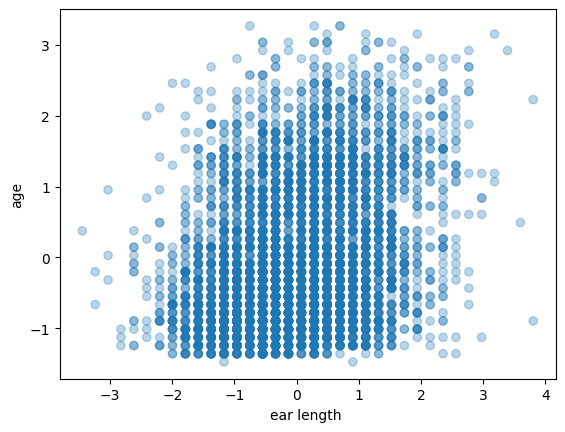

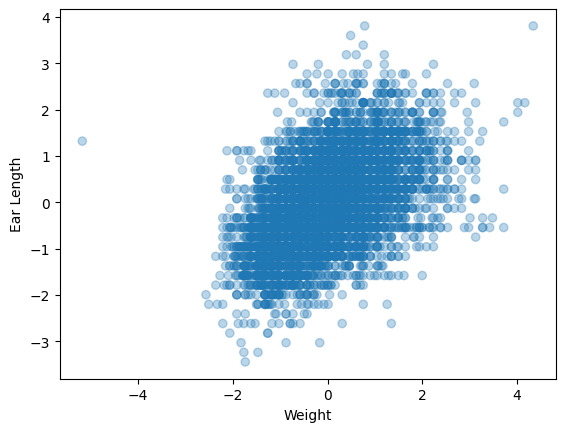

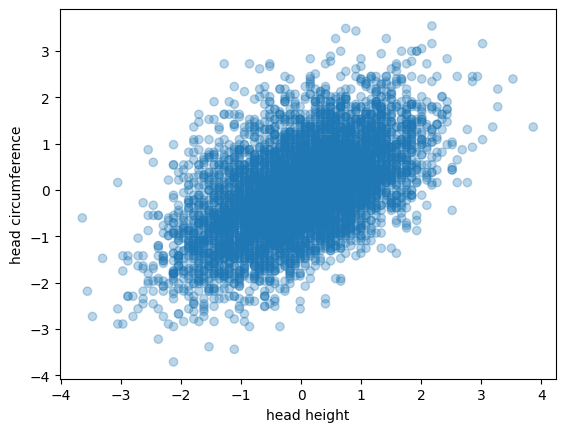

In [65]:

### Normalize all data


ansur_df = pd.DataFrame(StandardScaler().fit_transform(ansur_df), columns=ansur_df.columns)
ansur_scaler = StandardScaler()
ansur_scaled = ansur_scaler.fit_transform(ansur_df)

## 2. Print Covariances
print(ansur_df.cov())

## 3. Plot features most correlated to age, ear length and head circumference
correlations_ansur=ansur_df.corr()
print(correlations_ansur)


#plotting the important ones now
#age:
plt.scatter( ansur_df["ear.length"], ansur_df.age, marker='o', linestyle='', alpha=0.3)
plt.xlabel("ear length ")
plt.ylabel("age")
plt.show()

#ear length
plt.scatter(ansur_df.weight, ansur_df["ear.length"], marker='o', linestyle='', alpha=0.3)
plt.xlabel("Weight")
plt.ylabel("Ear Length")
plt.show()


#head circumference
plt.scatter(ansur_df["head.height"],ansur_df["head.circumference"] ,  marker='o', linestyle='', alpha=0.3)
plt.xlabel("head height")
plt.ylabel("head circumference")
plt.show()

### Interpretation

<span style="color:hotpink;">
Does anything stand out about these graphs? Or the correlations?<br>
Are correlations symmetric? Does the feature most correlated to ear length also have ear length as its most correlated pair?
</span>

<span style="color:hotpink;">Ear Length and weight definitely have a positive correlation to them, and head circumference and height definitely have a positive correlation.
Age and ear length is not super correlated in the most direct way, which makes sense as well.
Head height being correlated to circumference sounds like a sort of a circularity bias.</span>

### Regression

Now, we want to create a regression model to predict `head.circumference` from the data.

From our [Week 06](https://github.com/PSAM-5020-2025S-A/WK06) notebook, we can create a regression model by following these steps:

1. Load dataset (done! 🎉)
2. Encode label features as numbers (done! ⚡️)
3. Normalize the data (done! 🍾)
4. Separate the outcome variable and the input features
5. Create a regression model using all features
6. Run model on training data and measure error
7. Plot predictions and interpret results
8. Run model on test data, measure error, plot predictions, interpret results

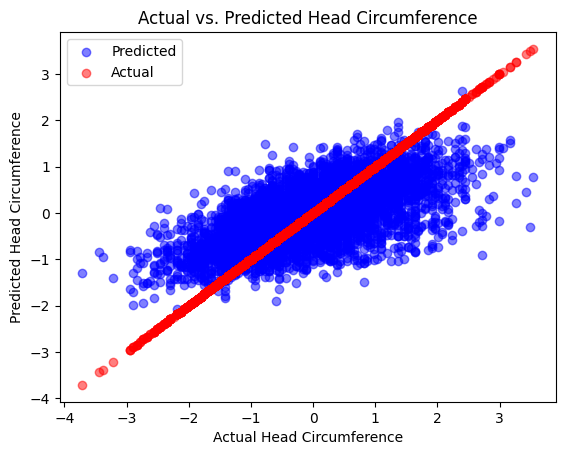

In [68]:
# Work on Regression Model here

## Separate outcome variable and input features
#output
headCircumference = ansur_df["head.circumference"]

#input
features= ansur_df[["head.height", "weight", "span"]]

## Create a regression model
ansur_model= LinearRegression()
ansur_model.fit(features, headCircumference)

## Measure error on training data
prediction_scaled = ansur_model.predict(features)
# Un-normalize the data

predicted = ansur_scaler.inverse_transform(prediction_scaled)
regression_error(ansur_df["head.circumference"], predicted["head.circumference"])

## Plot predictions and interpret results
# Plotting actual values in red
plt.scatter(ansur_df["head.circumference"], predicted, color='blue', alpha=0.5, label="Predicted")
plt.scatter(ansur_df["head.circumference"], ansur_df["head.circumference"], color='red', alpha=0.5, label="Actual")

# Adding labels and title
plt.xlabel("Actual Head Circumference")
plt.ylabel("Predicted Head Circumference")
plt.title("Actual vs. Predicted Head Circumference")

# Show legend
plt.legend()

# Show the plot
plt.show()



In [67]:
## Load Test 
from sklearn.preprocessing import OneHotEncoder

ANSUR_TEST_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/ansur-test.json"

ansur_test_data = object_from_json_url(ANSUR_TEST_FILE)
ansur_test_df = pd.json_normalize(ansur_test_data)

ansur_test_encoded_df = ansur_test_df.copy()

#added this because error--chatgot helped
ansur_encoder = OneHotEncoder(drop="first", sparse_output=False)
ansur_encoder.fit(ansur_df_test_copy[["gender"]])  # Fit on training data
g_vals = ansur_encoder.transform(ansur_test_df[["gender"]].values)
ansur_test_encoded_df[["gender"]] = g_vals

ansur_test_scaled_df = ansur_scaler.transform(ansur_test_encoded_df)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Exception: Input has wrong shape.

In [ ]:
## Run model on test data

## Measure error on test data

## Plot predictions and interpret results

### Interpretation

<span style="color:hotpink;">
How well does your model perform?<br>
How could you improve it?<br>
Are there ranges of circumferences that don't get predicted well?
</span>

<span style="color:hotpink;">EDIT THIS CELL WITH ANSWER</span>